In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.axes_style("white")

def show_elicitation_progress(df, hue='query', metric="hr@15", dir='figure/movielens',name="hr@15", save=False, title=None):
    fig, ax = plt.subplots(figsize=(6, 3))
    df = df.sort_values(by=['prec_tag'])
    print(df)
    #err_style="bars"
    ax = sns.lineplot(x='step', y=metric, hue=hue, style=hue, data=df, palette=["r", "b","g"],ci=95,markers=True)
    ax.set_xlabel("Step")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    plt.title(title)
    plt.tight_layout()
    if save:
        fig.savefig('{0}/{1}.pdf'.format(dir, name),
                    bbox_inches="tight", pad_inches=0, format='pdf')
    else:
        plt.show()

In [72]:
import pandas as pd
import os

data = 'movielens'
tdir = os.path.join('table',data)
df = pd.read_csv(os.path.join(tdir, 'main-type2-prec-tag-test.csv'))
    

In [73]:
df['prec_tag']=df['prec_tag'].apply(str)
df = df.rename(columns={"hr@1": "HR@1", "hr5@1": "HR@5","hr@10": "HR@10","hr@15": "HR@15","hr@20": "HR@20"})

In [74]:
df = df[df['prec_tag'].isin(['0.001','0.1','1000.0'])]

In [75]:
df.dtypes

fold           int64
HR@1         float64
HR@10        float64
HR@15        float64
HR@20        float64
hr@5         float64
prec_W       float64
prec_item    float64
prec_tag      object
query         object
step           int64
dtype: object

    fold      HR@1     HR@10     HR@15     HR@20      hr@5  prec_W  prec_item  \
19     1  0.013682  0.076206  0.100243  0.120668  0.048009     0.1      0.001   
23     1  0.020075  0.097485  0.122792  0.144487  0.063924     0.1      0.001   
16     1  0.010158  0.064975  0.087655  0.106219  0.038333     0.1      0.001   
17     1  0.010990  0.067099  0.090217  0.108409  0.040172     0.1      0.001   
18     1  0.012544  0.071214  0.094529  0.114823  0.043871     0.1      0.001   
22     1  0.018805  0.092778  0.117384  0.138948  0.059765     0.1      0.001   
20     1  0.014996  0.082029  0.105563  0.126426  0.051840     0.1      0.001   
21     1  0.016922  0.087743  0.111342  0.133015  0.055912     0.1      0.001   
29     1  0.023205  0.108015  0.133584  0.154425  0.072747     0.1      0.001   
28     1  0.019812  0.098141  0.123120  0.143895  0.064099     0.1      0.001   
27     1  0.016682  0.088575  0.112612  0.133300  0.057028     0.1      0.001   
26     1  0.014471  0.077891

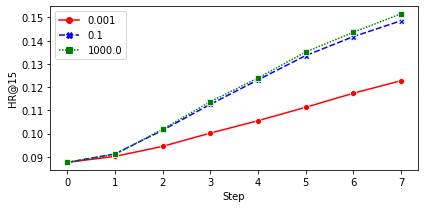

In [76]:
show_elicitation_progress(df,hue='prec_tag',metric='HR@15')

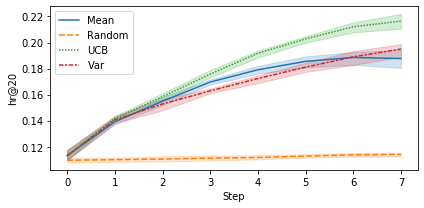

In [48]:
show_elicitation_progress(df,metric='hr@20')

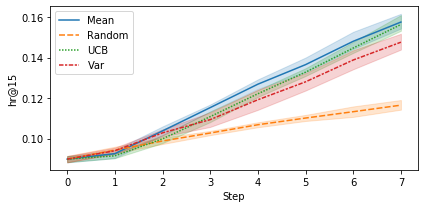

In [61]:
show_elicitation_progress(df,metric='hr@15',name='hr15e')

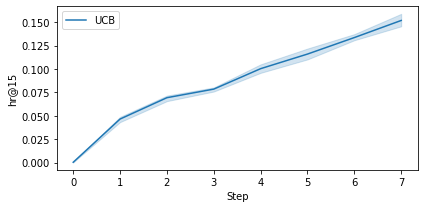

In [64]:
show_elicitation_progress(df,metric='hr@15',name='hr15e')

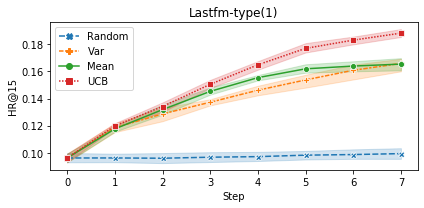

In [44]:
show_elicitation_progress(df,metric='HR@15',dir='figure/lastfm',name="fm1", save=True,title='Lastfm-type(1)')

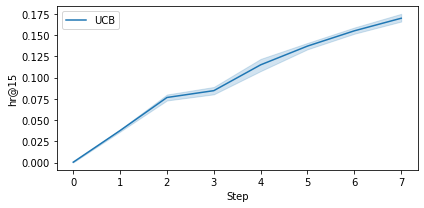

In [53]:
show_elicitation_progress(df,metric='hr@15')

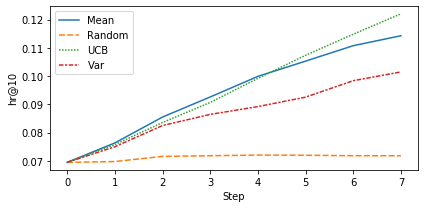

In [10]:
show_elicitation_progress(df,metric='hr@10')

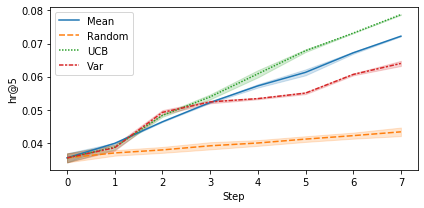

In [7]:
show_elicitation_progress(df,metric='hr@5')

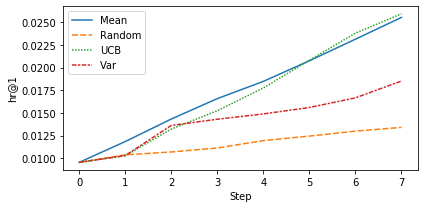

In [144]:
show_elicitation_progress(df,metric='hr@1')

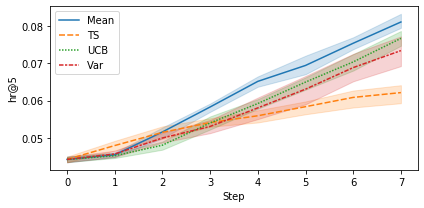

In [136]:
show_elicitation_progress(df,metric='hr@5')

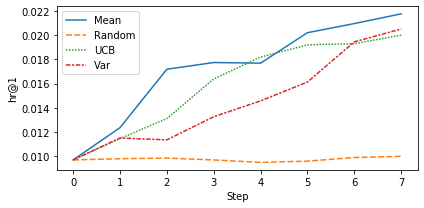

In [103]:
show_elicitation_progress(df,metric='hr@1')

In [85]:
import pandas as pd
import os

data = 'movielens'
tdir = os.path.join('table',data)
df = pd.read_csv(os.path.join(tdir, 'main-exc1.csv'))

In [93]:
sns.axes_style("dark")
a = df[df.step==7].drop('step',axis=1)

In [94]:
t = a.melt(id_vars=["query"], 
        var_name="hr@k", 
        value_name="value")
t = t.rename(columns={"query": "Query Strategy"})

In [95]:
t['hr@k'] = t['hr@k'].apply(lambda x: int(x[3:]))
t

,Query Strategy,hr@k,value
0,Mean,1,0.031573
1,Var,1,0.020696
2,UCB,1,0.028928
3,Random,1,0.013170
4,UCB,1,0.030224
5,Var,1,0.020324
6,Mean,1,0.031621
7,Random,1,0.013802
8,UCB,1,0.031222
9,Var,1,0.018948


In [98]:
def show_HR(df, hue='Query Strategy', x='hr@k',y="value", dir='figure/'+data,name="hr@15", save=False, title=None):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.set(style="whitegrid",color_codes=True)
    ax = sns.barplot(x=x, y=y, hue=hue, data=df,ci=95,hue_order=['Random','Var','Mean','UCB'],errwidth=1)
    hatches = ['-', '+', 'x', '\\\', '*', 'o']
    for i,thisbar in enumerate(ax.patches):
        print(i)
        thisbar.set_hatch(hatches[i//5])
    ax.set_xlabel("HR@K")
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles=handles[1:], labels=labels[1:])
    ax.set_ylabel('')
    plt.title(title)
    plt.tight_layout()
    if save:
        fig.savefig('{0}/{1}.pdf'.format(dir, name),
                    bbox_inches="tight", pad_inches=0, format='pdf')
    else:
        plt.show()

SyntaxError: invalid syntax (<ipython-input-98-94111d32c60f>, line 5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


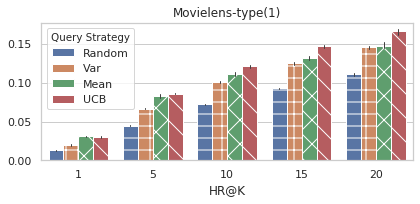

In [99]:
show_HR(t,save=True,name='mlhrk1',title='Movielens-type(1)')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.axes_style("white")

def show_elicitation_progress(df, hue='query', metric="hr@15", dir='figure/movielens',name="hr@15", save=False, title=None):
    fig, ax = plt.subplots(figsize=(6, 3))
    df = df.sort_values(by=['query'])
    #err_style="bars"
    ax = sns.lineplot(x='step', y=metric, hue=hue, style=hue, data=df, ci=95,markers=True,hue_order=['UCB-Zero','UCB-AVG','UCB-SVD'])
    ax.set_xlabel("Step")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    plt.title(title)
    plt.tight_layout()
    if save:
        fig.savefig('{0}/{1}.pdf'.format(dir, name),
                    bbox_inches="tight", pad_inches=0, format='pdf')
    else:
        plt.show()

In [17]:
import pandas as pd
import os

data = 'lastfm'
tdir = os.path.join('table',data)
df = pd.read_csv(os.path.join(tdir, 'main-all-init.csv'))
    

In [18]:
df = df.rename(columns={"hr@1": "HR@1", "hr5@1": "HR@5","hr@10": "HR@10","hr@15": "HR@15","hr@20": "HR@20"})

In [19]:
df

,step,query,HR@1,hr@5,HR@10,HR@15,HR@20
0,0,UCB-Zero,0.000000,0.000000,0.000000,0.000206,0.000720
1,1,UCB-Zero,0.003702,0.020053,0.033834,0.047614,0.058515
2,2,UCB-Zero,0.007919,0.033114,0.054710,0.071884,0.090703
3,3,UCB-Zero,0.010901,0.036713,0.057692,0.073735,0.093891
4,4,UCB-Zero,0.016043,0.042267,0.064891,0.092349,0.114665
...,...,...,...,...,...,...,...
115,3,UCB-AVG,0.009134,0.034980,0.056363,0.077123,0.099751
116,4,UCB-AVG,0.011210,0.041935,0.072348,0.097156,0.120926
117,5,UCB-AVG,0.016400,0.059477,0.093108,0.119058,0.144800
118,6,UCB-AVG,0.020241,0.069753,0.103591,0.133382,0.163899


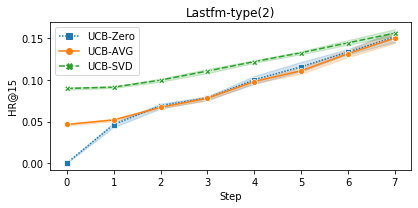

In [21]:
show_elicitation_progress(df,metric='HR@15',dir='figure/lastfm',name="fm2-init", save=True,title='Lastfm-type(2)')